# [【Pythonコード解説】OpenCVを使ってfinvizのヒートマップ画像を解析する](https://myfrankblog.com/analyze_finviz_heatmap_with_opencv/)

In [ ]:
#!pip install opencv-python

In [ ]:
!wget https://myfrankblog.com/wp-content/uploads/2021/03/6ca5455cd1ac43e37dd21acb1f502367.png -O screenshot.png

--2021-07-15 06:00:33--  https://myfrankblog.com/wp-content/uploads/2021/03/6ca5455cd1ac43e37dd21acb1f502367.png
Resolving myfrankblog.com (myfrankblog.com)... 183.90.240.16
Connecting to myfrankblog.com (myfrankblog.com)|183.90.240.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 371621 (363K) [image/png]
Saving to: ‘screenshot.png’

screenshot.png      100%[===================>] 362.91K   219KB/s    in 1.7s    

2021-07-15 06:00:36 (219 KB/s) - ‘screenshot.png’ saved [371621/371621]



In [ ]:
import cv2
img = cv2.imread("screenshot.png")

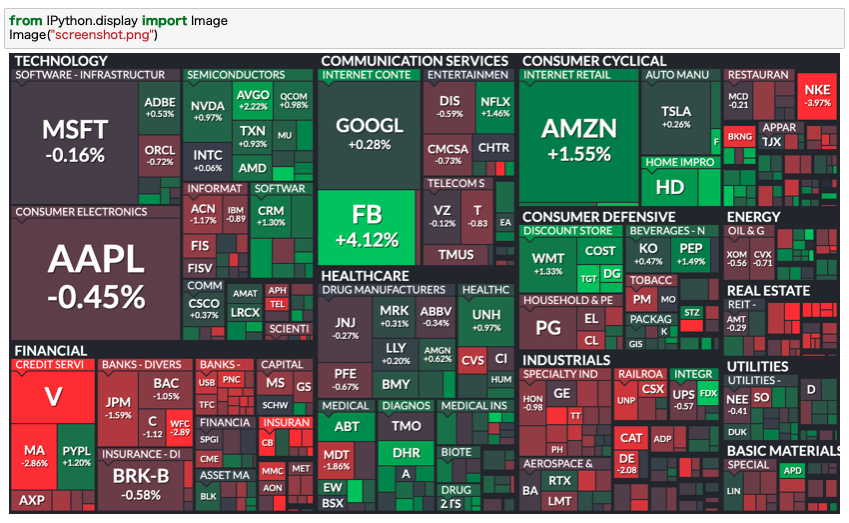

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [ ]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
average = cv2.mean(rgb)

In [ ]:
average

(105.1593799476158, 107.17000317548258, 101.83828911304944, 0.0)

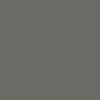

In [ ]:
import PIL
PIL.Image.new('RGB', (100, 100), tuple([int(i) for i in average[:-1]]))

In [ ]:
def jugde(average):
    if average[0] >= 180:
        print("おはぎゃー")
        return 1
    else:
        return 0

In [ ]:
print(jugde((180, 90, 80)))
print(jugde((150, 90, 80)))
print(jugde((120, 90, 80)))

おはぎゃー
1
0
0


In [ ]:
import cv2
import numpy as np

img = cv2.imread("screenshot.png")
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 抽出する色の範囲を指定する
lower_color = np.array([75 ,50, 50])
upper_color = np.array([255,100,100])

# 指定した色に基づいたフィルタリング
mask = cv2.inRange(rgb, lower_color, upper_color)
output = cv2.bitwise_and(img, img, mask=mask)

# 結果のファイルを画像として保存
cv2.imwrite("filtered_screenshot.png", output)

True

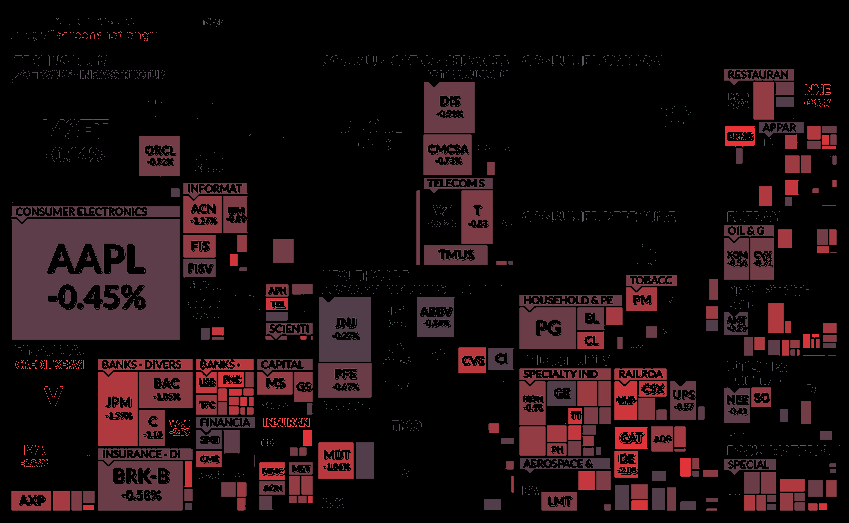

In [ ]:
cv2_imshow(output)

# [OpenCVでRGBとHSVのヒストグラムを取得する方法](https://qiita.com/tatsuya11bbs/items/ff4a07d73e14385b6922)

In [ ]:
import matplotlib.pyplot as plt

def show_img(path):
    img = cv2.imread(path)
    b, g, r = img[:,:,0], img[:,:,1], img[:,:,2]
    hist_b = cv2.calcHist([b],[0],None,[256],[0,256])
    hist_g = cv2.calcHist([g],[0],None,[256],[0,256])
    hist_r = cv2.calcHist([r],[0],None,[256],[0,256])
    plt.plot(hist_r, color='r', label="r")
    plt.plot(hist_g, color='g', label="g")
    plt.plot(hist_b, color='b', label="b")
    plt.legend()
    plt.show() 
    img2 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = img2[:,:,0], img2[:,:,1], img2[:,:,2]
    hist_h = cv2.calcHist([h],[0],None,[256],[0,256])
    hist_s = cv2.calcHist([s],[0],None,[256],[0,256])
    hist_v = cv2.calcHist([v],[0],None,[256],[0,256])
    plt.plot(hist_h, color='r', label="h")
    plt.plot(hist_s, color='g', label="s")
    plt.plot(hist_v, color='b', label="v")
    plt.legend()
    plt.show()

    return hist_r,hist_g, hist_b, hist_h, hist_s, hist_v


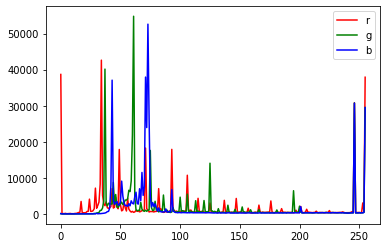

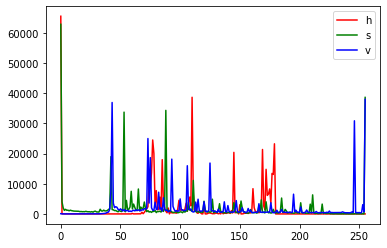

In [ ]:
r,g,b,h,s,v = show_img("screenshot.png")